<a href="https://colab.research.google.com/github/Samuel-pixe/Telecom/blob/main/Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Trabalho

In [ ]:
import cmath 
import numpy as np 
import matplotlib.pyplot as plt

sinal_temporario = [i.strip().split() for i in open("./sinal.dat").readlines()] 
sinal = [] 


for i in range(len(sinal_temporario)-1):
    sinal.append(float(sinal_temporario[i][1]))


def fft(s):
    tamanho_sinal = len(s) 
    
    if tamanho_sinal == 1: 
    	return s 
    
    par = [] 
    impar = [] 

    i = 0
    while i < tamanho_sinal:
        if i % 2 == 0:
            par.append(s[i])
		
        else:
            impar.append(s[i]) 
        i = i + 1
    
    

    par = fft(par)
    impar = fft(impar)
    


    T = []
    i = 0
    while i < tamanho_sinal/2:
        T.append(cmath.exp(-2j*cmath.pi*i/tamanho_sinal)*impar[i])
        i = i + 1


    retorno = []
    i = 0
    while i < tamanho_sinal/2:
        retorno.append(par[i] + T[i])
        i = i + 1
    
    i = 0
    while i < tamanho_sinal/2:
        retorno.append(par[i] - T[i])
        i = i + 1

    return retorno 


resultado = fft(sinal) 


x = np.linspace(0, 512, 512)

plt.plot(x, resultado, label='Projeto Telecom')

plt.show() 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import cmath 


n=1000
tx = 200
w = 2.0 * np.pi/tx

t=np.linspace(0, tx, n)
a1 = 2.0*np.cos(2.0*w*t)
a2 = 1.0*np.cos(30.0*w*t)
a = a1*a2

freq = np.fft.fftfreq(n)
mascara = freq > 0 

fft_calculo = np.fft.fft(s)
fft_abs = 2.0*np.abs(fft_calculo/n)

plt.figure(1)
plt.title("sinal")
plt.plot(t,s)

plt.figure(2)
plt.title("sinal")
plt.plot(freq[mascara],fft_abs[mascara])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


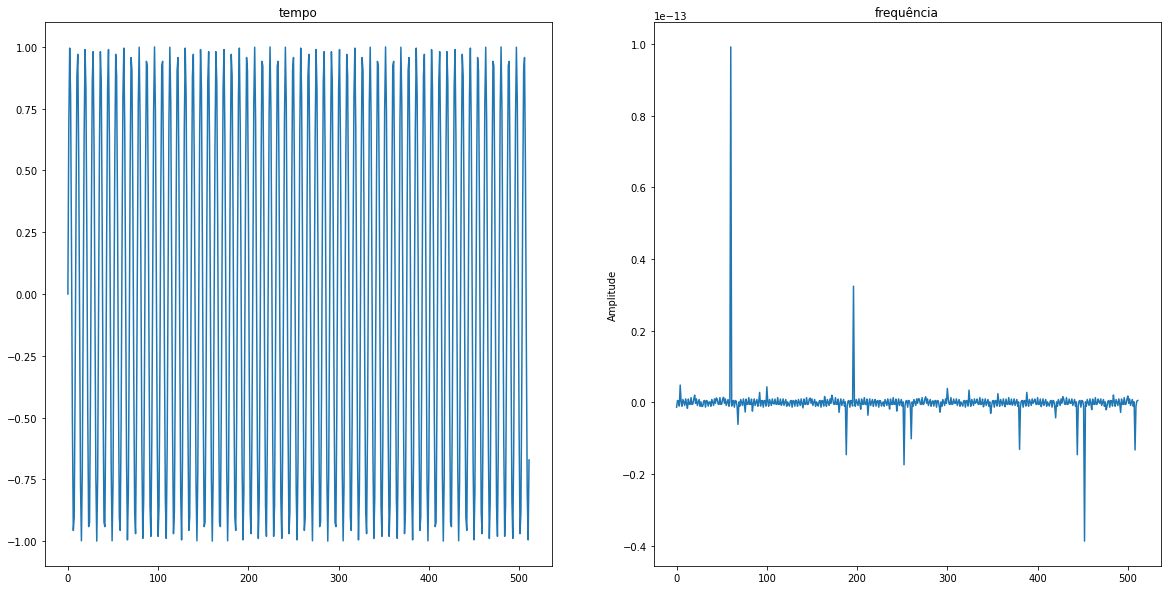

In [ ]:
import matplotlib.pyplot as plt
from cmath import exp, pi

#acesso ao arquivo sinal.dat
file = open('sinal.dat', 'r')

#cria uma lista de resultados
resultado = list()
for line in file:
    line

    colunas = line
    
    line = line.replace(" ", "")#print(columns) 
    
    #transforma cada numero em float para que sejam realizados o calculos             
    if complex(''.join(colunas.split())):
        resultado.append(complex(''.join(colunas.split())))
#print(resultado)   

#conta a partir do 1,
resultado=resultado[:-1]#print(len(resultado))

#funcao fft
def fft(x):
    N = len(x)
    if N <= 1: return x
    even = fft(x[0::2]) #separa os pares e os impares
    odd =  fft(x[1::2])
    T= [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)] #formula da fft
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]             #retorna o resultados
 
plt.figure(figsize=(20,10)) #define o tamanho do gráfico 
plt.subplot(121), plt.plot(resultado), plt.title("tempo") #plota o gráfico no dominio do tempo 
plt.subplot(122), plt.plot(fft(resultado)), plt.title("frequência")   #plota o gráfico no dominio da frequência
plt.ylabel('Amplitude')  #nomeia os eixos do gráfico
plt.show()

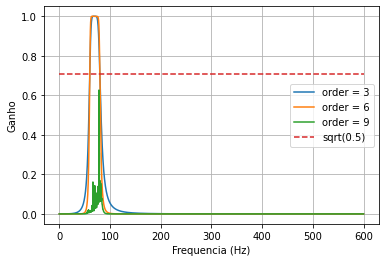

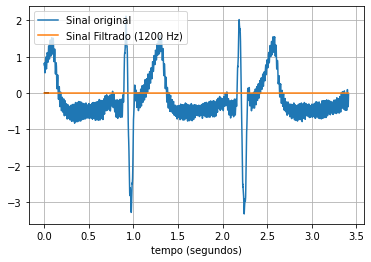

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz
import numpy as np

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

file = open('Sinal.txt', 'r')

x = []
y = []
for line in file:
  res = line.rstrip('\n').split("\t")
  x.append(float(res[0].replace(',','.')))
  y.append(float(res[1].replace(',','.')))


fs = 1200.0
lowcut = 60.0
highcut = 80.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
  b, a = butter_bandpass(lowcut, highcut, fs, order=order)
  w, h = freqz(b, a, fs=fs, worN=2000)
  plt.plot(w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],'--', label='sqrt(0.5)')
plt.xlabel('Frequencia (Hz)')
plt.ylabel('Ganho')
plt.grid(True)
plt.legend(loc='best')

# Filter a noisy signal.
T = 0.05
nsamples = 4096
t = np.arange(0, nsamples) / fs
a = 0.01
f0 = 1200.0
plt.figure(2)
plt.clf()
plt.plot(x, y, label='Sinal original')
 
y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
plt.plot(t, y, label='Sinal Filtrado (%g Hz)' % f0)
plt.xlabel('tempo (segundos)')
plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

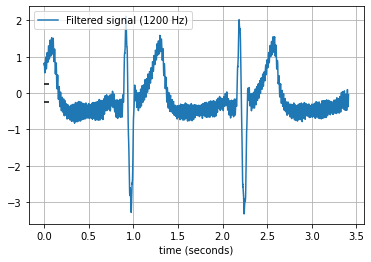

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz
import numpy as np

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

file = open('Sinal.txt', 'r')

x = []
y = []
for line in file:
  res = line.rstrip('\n').split("\t")
  x.append(float(res[0].replace(',','.')))
  y.append(float(res[1].replace(',','.')))

#y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
plt.xlabel('time (seconds)')
plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')